In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Colab Notebooks/master_thesis

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/master_thesis


In [ ]:
import pandas as pd
import pickle

In [ ]:
docid_ls = []
comp_docid_ls = []
simp_docid_ls = []
comp_ls = []
simp_ls = []
with open('src/newsela_articles_20150302.aligned.sents.txt', 'r') as f:
    for line in f:
        docid, comp_docid, simp_docid, comp, simp = line.split('\t')
        docid_ls.append(docid)
        comp_docid_ls.append(comp_docid)
        simp_docid_ls.append(simp_docid)
        comp_ls.append(comp)
        simp_ls.append(simp.rstrip('\n'))

In [ ]:
newsela_dataframe = pd.DataFrame(data={'docid':docid_ls, 'comp_docid':comp_docid_ls, 'simp_docid':simp_docid_ls,
                                       'comp':comp_ls, 'simp':simp_ls})

In [ ]:
newsela_dataframe

,docid,comp_docid,simp_docid,comp,simp
0,DOC1,V0,V2,Poll finds Americans OK with women in combat,"Women get the OK to fight in combat units, pub..."
1,DOC1,V0,V3,Poll finds Americans OK with women in combat,Women get the OK to fight in combat units
2,DOC1,V2,V3,"Women get the OK to fight in combat units, pub...",Women get the OK to fight in combat units
3,DOC1,V0,V1,Wars of the future will be fought with America...,American women will soon be free to fight on t...
4,DOC1,V0,V2,Wars of the future will be fought with America...,American women will soon be able to fight on t...
...,...,...,...,...,...
141577,DOC1130,V0,V1,"And the country is on track to produce 42,500 ...",Colombian land dedicated to avocado production...
141578,DOC1130,V0,V2,"And the country is on track to produce 42,500 ...",Colombian land dedicated to avocado production...
141579,DOC1130,V1,V2,Colombian land dedicated to avocado production...,"The country is on track to produce 42,500 tons..."
141580,DOC1130,V0,V1,""" But 42,000 tons is n't enough , "" he said , ...",""" But 42,000 tons is n't enough , "" Iragorri s..."


In [ ]:
with open('src/newsela_dataframe.pickle', 'wb') as f:
    pickle.dump(newsela_dataframe, f)

In [ ]:
data = newsela_dataframe.copy()

# newsela only

## make intermediate sentences by newsela sentences

In [ ]:
data

,docid,comp_docid,simp_docid,comp,simp,edit_sequences,aligns
0,DOC1,V0,V2,Poll finds Americans OK with women in combat,"Women get the OK to fight in combat units, pub...","[[ad_span, 0], [ad_span, 1], [a_span, 0]]","[([3], [3]), ([6], [6]), ([7], [7])]"
1,DOC1,V0,V3,Poll finds Americans OK with women in combat,Women get the OK to fight in combat units,"[[rep_span, 0], [ad_span, 1], [a_span, 0]]","[([2], [2]), ([3], [3]), ([5], [0]), ([6], [6]..."
2,DOC1,V2,V3,"Women get the OK to fight in combat units, pub...",Women get the OK to fight in combat units,"[[d_span, 0]]","[([0], [0]), ([1], [1]), ([2], [2]), ([3], [3]..."
3,DOC1,V0,V1,Wars of the future will be fought with America...,American women will soon be free to fight on t...,"[[rep_span, 1], [ad_span, 0], [ad_span, 2], [a...","[([1], [12]), ([4], [2]), ([5], [4]), ([6], [7..."
4,DOC1,V0,V2,Wars of the future will be fought with America...,American women will soon be able to fight on t...,"[[rep_span, 1], [ad_span, 0], [ad_span, 2], [a...","[([1], [12]), ([4], [2]), ([5], [4]), ([6], [7..."
...,...,...,...,...,...,...,...
141577,DOC1130,V0,V1,"And the country is on track to produce 42,500 ...",Colombian land dedicated to avocado production...,"[[d_span, 0], [a_span, 0]]","[([0], [13]), ([1], [14]), ([2], [15]), ([3], ..."
141578,DOC1130,V0,V2,"And the country is on track to produce 42,500 ...",Colombian land dedicated to avocado production...,"[[ad_span, 0], [ad_span, 1]]","[([6], [3]), ([7], [5]), ([17], [13])]"
141579,DOC1130,V1,V2,Colombian land dedicated to avocado production...,"The country is on track to produce 42,500 tons...","[[d_span, 0], [a_span, 0]]","[([14], [0]), ([15], [1]), ([16], [2]), ([17],..."
141580,DOC1130,V0,V1,""" But 42,000 tons is n't enough , "" he said , ...",""" But 42,000 tons is n't enough , "" Iragorri s...","[[rep_span, 0]]","[([0], [0]), ([1], [1]), ([2], [2]), ([3], [3]..."


In [ ]:
import tqdm
id2sent = {}
id2diff = {}
sent2id = {}
id = 0
for i in tqdm.tqdm(range(len(data))):
    simple = data.iloc[i]['simp']
    simple_level = int(data.iloc[i]['simp_docid'][-1])
    original = data.iloc[i]['comp']
    original_level = int(data.iloc[i]['comp_docid'][-1])
    if original not in sent2id:
        sent2id[original] = id
        id2sent[id] = original
        id2diff[id] = original_level
        id += 1
    if simple not in sent2id:
        sent2id[simple] = id
        id2sent[id] = simple
        id2diff[id] = simple_level
        id += 1

100%|██████████| 141582/141582 [00:50<00:00, 2794.69it/s]


In [ ]:
sent_set_all = []
tmp_set = []
for i in tqdm.tqdm(range(len(data))):
    simple = data.iloc[i]['simp']
    simple_id = sent2id[simple]
    original = data.iloc[i]['comp']
    original_id = sent2id[original]
    if len(tmp_set) == 0:
        tmp_set.append(original_id)
        tmp_set.append(simple_id)
    else:
        if (simple_id in tmp_set) or (original_id in tmp_set):
            if simple_id not in tmp_set:
                tmp_set.append(simple_id)
            elif original_id not in tmp_set:
                tmp_set.append(original_id)
            else:
                continue
        else:
            sent_set_all.append(tmp_set)
            tmp_set = []
            tmp_set.append(original_id)
            tmp_set.append(simple_id)

sent_set_all.append(tmp_set)

100%|██████████| 141582/141582 [00:37<00:00, 3767.32it/s]


In [ ]:
sent_set_all[:10]

[[0, 1, 2],
 [3, 4, 5, 6, 7, 8],
 [9, 10, 11, 12, 13, 14],
 [15, 16, 17],
 [18, 19],
 [20, 21, 22, 23],
 [24, 25, 26, 27, 28],
 [29, 30, 31, 32, 33],
 [34, 35, 36, 37],
 [38, 39, 40, 41, 42]]

In [ ]:
for i in sent_set_all[1]:
    print(id2diff[i], id2sent[i])

0 Wars of the future will be fought with American women on the front lines and the public has no problem with it .
1 American women will soon be free to fight on the front lines of battle and they will go with the public 's support .
2 American women will soon be able to fight on the front lines of war .
3 American women will soon be able to go to war on the front lines .
4 American women will soon be able to fight in wars .
2 And they will go with the public 's support .


In [ ]:
for i in sent_set_all[3]:
    print(id2diff[i], id2sent[i])

0 U.S. Secretary of Defense Leon Panetta announced the policy change last week , explaining that the decision was influenced by the role women have already played in risking life and limb in wars of the past decade .
1 U.S. Secretary of Defense Leon Panetta explained the decision last week at the Pentagon , the military 's headquarters .
1 He pointed out that women have already risked life and limb in wars of the past decade .


In [ ]:
#Function that returns the id of the V0 sentence corresponding to the id when the id is given
def id2instid(id, sent_set_all):
    sent_set_all_prefix = [i[0] for i in sent_set_all]
    for i in range(len(sent_set_all_prefix)):
        if id > sent_set_all_prefix[i]:
            if i < len(sent_set_all_prefix)-1:
                continue
            else:
                instid = i
        elif id == sent_set_all_prefix[i]:
            instid = i
            break
        else:
            instid = i-1
            break
    return instid

In [ ]:
id2instid(9, sent_set_all)

2

In [ ]:
case_num = []
for i in tqdm.tqdm(range(len(data))):
    simple = data.iloc[i]['simp']
    simple_id = sent2id[simple]
    original = data.iloc[i]['comp']
    original_id = sent2id[original]
    instid = id2instid(original_id, sent_set_all)
    case_num.append(instid)

100%|██████████| 141582/141582 [16:43<00:00, 141.12it/s]


In [ ]:
data['case_num'] = case_num
data['simple'] = data['simp']
data['original'] = data['comp']

In [ ]:
len(set(case_num))

29080

In [ ]:
data[['simple', 'original', 'case_num']]

,simple,original,case_num
0,"Women get the OK to fight in combat units, pub...",Poll finds Americans OK with women in combat,0
1,Women get the OK to fight in combat units,Poll finds Americans OK with women in combat,0
2,Women get the OK to fight in combat units,"Women get the OK to fight in combat units, pub...",0
3,American women will soon be free to fight on t...,Wars of the future will be fought with America...,1
4,American women will soon be able to fight on t...,Wars of the future will be fought with America...,1
...,...,...,...
141577,Colombian land dedicated to avocado production...,"And the country is on track to produce 42,500 ...",29083
141578,Colombian land dedicated to avocado production...,"And the country is on track to produce 42,500 ...",29083
141579,"The country is on track to produce 42,500 tons...",Colombian land dedicated to avocado production...,29083
141580,""" But 42,000 tons is n't enough , "" Iragorri s...",""" But 42,000 tons is n't enough , "" he said , ...",29084


In [ ]:
orig_simp_diff= []
for i in tqdm.tqdm(range(len(data))):
    simple = data.iloc[i]['simp']
    simple_id = sent2id[simple]
    simple_level = id2diff[simple_id]
    original = data.iloc[i]['comp']
    original_id = sent2id[original]
    original_level = id2diff[original_id]
    orig_simp_diff.append(simple_level - original_level)

100%|██████████| 141582/141582 [00:36<00:00, 3841.78it/s]


In [ ]:
data["orig_simp_diff"] = orig_simp_diff

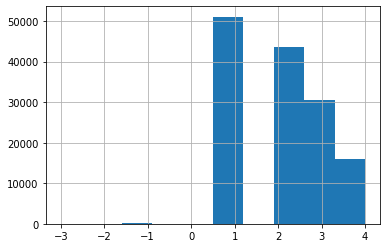

In [ ]:
data["orig_simp_diff"].hist()

In [ ]:
newsela_only_woaug = data[data["orig_simp_diff"] == 4].copy() # Limit the difference in difficulty to only 4 sentences

In [ ]:
newsela_only_woaug["case_num"]

9             1
19            2
37            6
47            7
60            9
          ...  
141529    29068
141546    29075
141557    29078
141565    29078
141573    29079
Name: case_num, Length: 16084, dtype: int64

In [ ]:
newsela_only_woaug["group_id"] = range(len(newsela_only_woaug))

In [ ]:
newsela_only_aug_inter = []
newsela_only_aug_orig_simp_pairs = [] 
for i in tqdm.tqdm(range(len(newsela_only_woaug["case_num"]))):
    case_num = newsela_only_woaug.iloc[i]["case_num"]
    data_ = data[data["case_num"] == case_num]
    simple_woaug = newsela_only_woaug.iloc[i]["simple"]
    original_woaug = newsela_only_woaug.iloc[i]["original"]
    inter_tmp = []
    pairs_tmp = []
    for j in range(len(data_)):
        simple = data_.iloc[j]['simple']
        simple_id = sent2id[simple]
        simple_level = id2diff[simple_id]
        original = data_.iloc[j]['original']
        original_id = sent2id[original]
        original_level = id2diff[original_id]
        diff = simple_level - original_level
        pairs_tmp.append(((original, original_level), (simple, simple_level)))
        if diff != 4:
            if (simple != simple_woaug) and (original == original_woaug) and ((simple, simple_level) not in inter_tmp):
                inter_tmp.append((simple, simple_level))
            elif (simple == simple_woaug) and (original != original_woaug) and ((original, original_level) not in inter_tmp):
                inter_tmp.append((original, original_level))
            else:
                continue #ignore intermediate sentences when they are paired with each other.
    newsela_only_aug_inter.append(inter_tmp)
    newsela_only_aug_orig_simp_pairs.append(pairs_tmp)

100%|██████████| 16084/16084 [00:56<00:00, 285.25it/s]


In [ ]:
newsela_only_aug_orig_simp_pairs[0]

[(('Wars of the future will be fought with American women on the front lines and the public has no problem with it .',
   0),
  ("American women will soon be free to fight on the front lines of battle and they will go with the public 's support .",
   1)),
 (('Wars of the future will be fought with American women on the front lines and the public has no problem with it .',
   0),
  ('American women will soon be able to fight on the front lines of war .',
   2)),
 (("American women will soon be free to fight on the front lines of battle and they will go with the public 's support .",
   1),
  ('American women will soon be able to fight on the front lines of war .',
   2)),
 (('Wars of the future will be fought with American women on the front lines and the public has no problem with it .',
   0),
  ('American women will soon be able to go to war on the front lines .', 3)),
 (("American women will soon be free to fight on the front lines of battle and they will go with the public 's supp

In [ ]:
newsela_only_aug = newsela_only_woaug.copy() # aug = augmentation, woaug = w/o augmentation
newsela_only_aug["inter"] = newsela_only_aug_inter
newsela_only_aug["orig_simp_pairs"] = newsela_only_aug_orig_simp_pairs

In [ ]:
len(newsela_only_aug)

16084

In [ ]:
newsela_only_aug['original'].iloc[101]

'At the same time , several county animal control departments in the Chicago area say they have tried to cope with an unusually high number of horse abandonment calls , which have to be handled by staffs and facilities mostly equipped to deal with cats and dogs .'

In [ ]:
newsela_only_aug['simple'].iloc[101]

'But the departments are used to dealing with just cats and dogs .'

In [ ]:
newsela_only_aug['inter'].iloc[101]

[('Several county animal control departments in the Chicago area say that they have tried to cope with an unusually high number of horse abandonment cases .',
  1),
 ('Several animal control departments in Illinois say they are getting an unusually high number of calls about horse abandonment .',
  3),
 ('But the calls have to be handled by staff and facilities mostly equipped to deal with cats and dogs .',
  1),
 ('But such departments are mostly equipped to deal with cats and dogs .', 2)]

In [ ]:
newsela_only_aug["original"].iloc[0]

'Wars of the future will be fought with American women on the front lines and the public has no problem with it .'

In [ ]:
newsela_only_aug["simple"].iloc[0]

'American women will soon be able to fight in wars .'

In [ ]:
for s in newsela_only_aug["inter"].iloc[0]:
    print(s)

American women will soon be free to fight on the front lines of battle and they will go with the public 's support .
American women will soon be able to fight on the front lines of war .
American women will soon be able to go to war on the front lines .
And they will go with the public 's support .


In [ ]:
inter_len = []
for i in range(len(newsela_only_aug)):
    inter_len.append(len(newsela_only_aug.iloc[i]["inter"]))

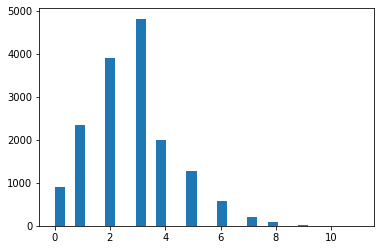

In [ ]:
import matplotlib.pyplot as plt
plt.hist(inter_len, bins=30)
plt.show()

In [ ]:
newsela_only_aug["inter_len"] = inter_len

In [ ]:
newsela_only_aug[newsela_only_aug["inter_len"] == 10].iloc[0]["original"]

"Ray Brewer , president of CH4 Power , drew Koetsier back to the digester concept with the promise of a new , potentially less risky way of doing business : Instead of Koetsier running the operation , CH4 will lease the land where the system will be installed and buy Koetsier 's manure ."

In [ ]:
newsela_only_aug[newsela_only_aug["inter_len"] == 10].iloc[0]["simple"]

'Instead , CH4 will rent the land where the system will be built .'

In [ ]:
newsela_only_aug[newsela_only_aug["inter_len"] == 10].iloc[0]["inter"]

[('Yet water samples taken at the barrier site and in stretches of canal on the Lake Michigan side of the barrier show something different .',
  1),
 ('Yet water samples have been taken at the barrier site .', 2),
 ('Yet , water samples have been taken near the fence .', 3),
 ("And they 've been taken in stretches of canal on the Lake Michigan side of the barrier .",
  2),
 ("And they 've been taken in parts of the canal on the Lake Michigan side of the fence .",
  3),
 ('They have regularly tested positive for Asian carp DNA during the past four years .',
  1),
 ('The samples have regularly shown up Asian carp DNA during the past four years . DNA contains the codes for the cells in animals bodies .',
  3),
 ('And a poisoning of the canal in the area around the barrier in late 2009 turned up the carcass of a single Asian carp .',
  2),
 ('There was a poisoning of the canal in the area around the fence in 2009 .',
  3),
 ('Afterwards , the body of a single Asian carp turned up .', 3)]

In [ ]:
# make these data (newsela_only_woug, newsela_only_aug) be trainable format
import tqdm
import random
def make_trainable(data, mode, m=1, m_seed=1):
    if mode == 'woaug':
        orig1 = []
        orig2 = []
        simp1 = []
        simp2 = []
        group_ids = []
        for i in tqdm.tqdm(range(len(data))):
            simple = data.iloc[i]["simple"]
            original = data.iloc[i]["original"]
            group_id = data.iloc[i]["group_id"]
            orig1.append(original), orig2.append(original), simp1.append(original), simp2.append(simple), group_ids.append(group_id)
            orig1.append(simple), orig2.append(simple), simp1.append(original), simp2.append(simple), group_ids.append(group_id)
        return pd.DataFrame(data={"orig1":orig1, "orig2":orig2, "simp1":simp1, "simp2":simp2, "group_id":group_ids})

    elif mode == 'aug':
        random.seed(m_seed)
        orig1 = []
        orig2 = []
        simp1 = []
        simp2 = []
        group_ids = []
        for i in tqdm.tqdm(range(len(data))):
            simple = data.iloc[i]["simple"]
            original = data.iloc[i]["original"]
            group_id = data.iloc[i]["group_id"]
            orig1.append(original), orig2.append(original), simp1.append(original), simp2.append(simple), group_ids.append(group_id)
            orig1.append(simple), orig2.append(simple), simp1.append(original), simp2.append(simple), group_ids.append(group_id)
            inters = data.iloc[i]["inter"]
            inters_to_select = random.sample(inters, min(m, len(inters)))
            for inter in inters_to_select:
                orig1.append(inter[0]), orig2.append(inter[0]), simp1.append(original), simp2.append(simple), group_ids.append(group_id)
                orig1.append(original), orig2.append(original), simp1.append(original), simp2.append(inter[0]), group_ids.append(group_id)
                orig1.append(original), orig2.append(original), simp1.append(inter[0]), simp2.append(simple), group_ids.append(group_id)
                orig1.append(simple), orig2.append(simple), simp1.append(original), simp2.append(inter[0]), group_ids.append(group_id)
                orig1.append(simple), orig2.append(simple), simp1.append(inter[0]), simp2.append(simple), group_ids.append(group_id)
                orig1.append(inter[0]), orig2.append(inter[0]), simp1.append(original), simp2.append(inter[0]), group_ids.append(group_id)
                orig1.append(inter[0]), orig2.append(inter[0]), simp1.append(inter[0]), simp2.append(simple), group_ids.append(group_id)
                orig1.append(original), orig2.append(inter[0]), simp1.append(original), simp2.append(simple), group_ids.append(group_id)
                orig1.append(inter[0]), orig2.append(simple), simp1.append(original), simp2.append(simple), group_ids.append(group_id)
        return pd.DataFrame(data={"orig1":orig1, "orig2":orig2, "simp1":simp1, "simp2":simp2, "group_id":group_ids})

In [ ]:
a = make_trainable(newsela_only_woaug, mode="woaug")

In [ ]:
a

,orig1,orig2,simp1,simp2,group_id
0,Wars of the future will be fought with America...,Wars of the future will be fought with America...,Wars of the future will be fought with America...,American women will soon be able to fight in w...,0
1,American women will soon be able to fight in w...,American women will soon be able to fight in w...,Wars of the future will be fought with America...,American women will soon be able to fight in w...,0
2,Most Americans favor the Defense Department 's...,Most Americans favor the Defense Department 's...,Most Americans favor the Defense Department 's...,A new poll shows most Americans support the ch...,1
3,A new poll shows most Americans support the ch...,A new poll shows most Americans support the ch...,Most Americans favor the Defense Department 's...,A new poll shows most Americans support the ch...,1
4,The Pentagon said it expects to open up many j...,The Pentagon said it expects to open up many j...,The Pentagon said it expects to open up many j...,Many of the banned jobs will open up to women ...,2
...,...,...,...,...,...
32163,Florida is the second-largest avocado state in...,Florida is the second-largest avocado state in...,The state is the second-largest producer behin...,Florida is the second-largest avocado state in...,16081
32164,The state is the second-largest producer behin...,The state is the second-largest producer behin...,The state is the second-largest producer behin...,It is expected to grow about 66 million pounds...,16082
32165,It is expected to grow about 66 million pounds...,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...,It is expected to grow about 66 million pounds...,16082
32166,"Florida specializes in "" green skins "" that ar...","Florida specializes in "" green skins "" that ar...","Florida specializes in "" green skins "" that ar...",Florida specializes in green avocados .,16083


In [ ]:
b = make_trainable(newsela_only_aug, mode="aug", m=2, m_seed=1)

100%|██████████| 16084/16084 [00:10<00:00, 1591.83it/s]


In [ ]:
b

,orig1,orig2,simp1,simp2,group_id
0,Wars of the future will be fought with America...,Wars of the future will be fought with America...,Wars of the future will be fought with America...,American women will soon be able to fight in w...,0
1,American women will soon be able to fight in w...,American women will soon be able to fight in w...,Wars of the future will be fought with America...,American women will soon be able to fight in w...,0
2,American women will soon be able to fight on t...,American women will soon be able to fight on t...,Wars of the future will be fought with America...,American women will soon be able to fight in w...,0
3,Wars of the future will be fought with America...,Wars of the future will be fought with America...,Wars of the future will be fought with America...,American women will soon be able to fight on t...,0
4,Wars of the future will be fought with America...,Wars of the future will be fought with America...,American women will soon be able to fight on t...,American women will soon be able to fight in w...,0
...,...,...,...,...,...
289635,Florida specializes in green avocados .,Florida specializes in green avocados .,"Unlike California and Colombia , however , Flo...",Florida specializes in green avocados .,16083
289636,"Unlike California and Colombia , however , Flo...","Unlike California and Colombia , however , Flo...","Florida specializes in "" green skins "" that ar...","Unlike California and Colombia , however , Flo...",16083
289637,"Unlike California and Colombia , however , Flo...","Unlike California and Colombia , however , Flo...","Unlike California and Colombia , however , Flo...",Florida specializes in green avocados .,16083
289638,"Florida specializes in "" green skins "" that ar...","Unlike California and Colombia , however , Flo...","Florida specializes in "" green skins "" that ar...",Florida specializes in green avocados .,16083


In [ ]:
with open('./src/newsela_v6/newsela_only/newsela_only_woaug.pickle', 'wb') as f:
    pickle.dump(newsela_only_woaug, f)
with open('./src/newsela_v6/newsela_only/newsela_gold.pickle', 'wb') as f:
    pickle.dump(newsela_only_aug, f)